# Practice

In [69]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


### Initial Conditions

In [70]:
def u_initial(nx):   
    x = numpy.linspace(0,4,nx) 
    u = numpy.zeros(nx) 
    lbound = numpy.where(x >= 0)
    
    ubound = numpy.where(x <= 2)
    bounds = numpy.intersect1d(lbound, ubound)
    u[bounds]=1

    return u

### Compute F

In [71]:
def computeF(u):
    return u**2 / 2.

### MacCormack

In [167]:
def maccormack(u, nt, dt, dx):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()    
    
    epsilon = 1. #1. #1. #0. #.5 #.6 #.7 #.8 #.9#.25 #.1 #1. 

    for n in range(1,nt):
        damp_term = epsilon*(u[1:] - 2*u[:-1] + u[:-1]) 
        F = computeF(u)
        
        #print(damp_term)  
        
        ustar[:-1] =   u[:-1] - dt/dx * (F[1:]-F[:-1]) + damp_term
        #ustar += damp_term 
        Fstar = computeF(ustar)
        un[n,1:] = .5 * (u[1:]+ustar[1:] - dt/dx * (Fstar[1:] - Fstar[:-1]))
        u = un[n].copy()
    return un

### Execute


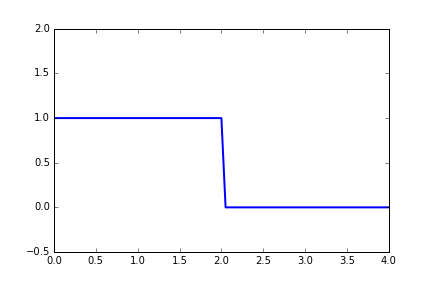
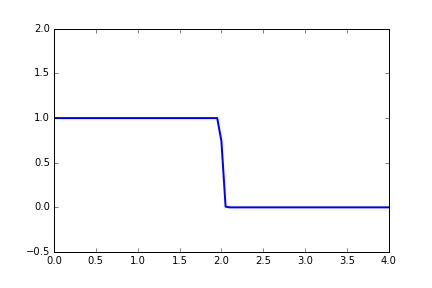
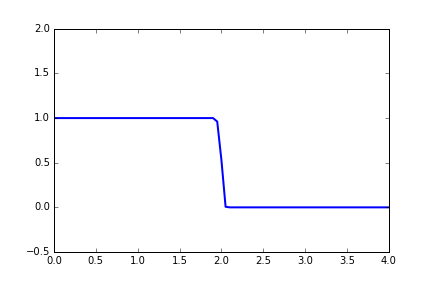
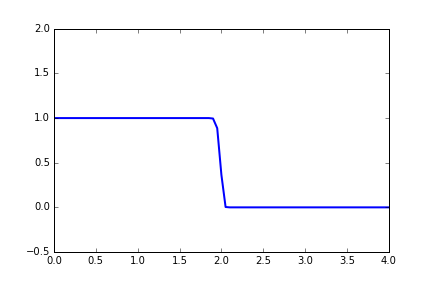
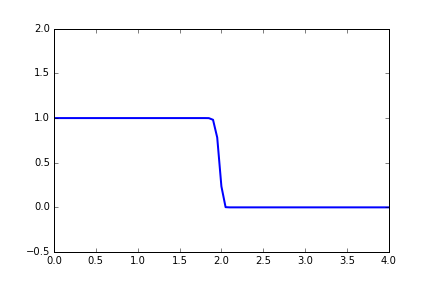
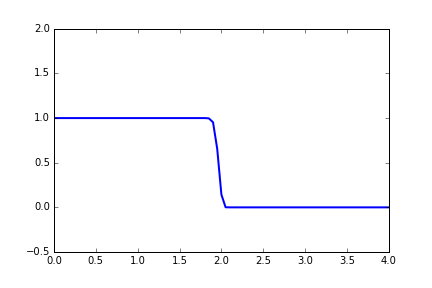
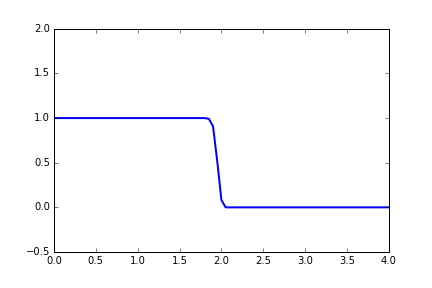
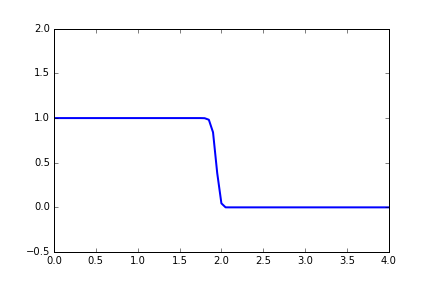
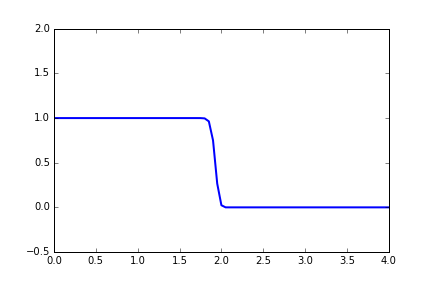
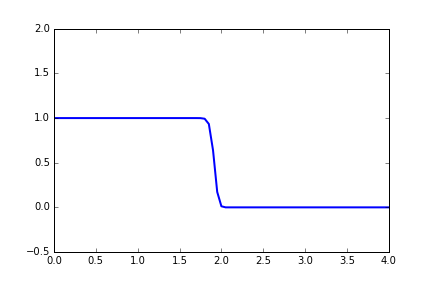
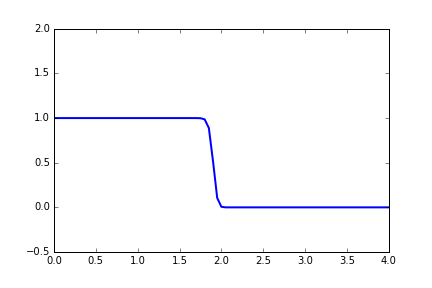
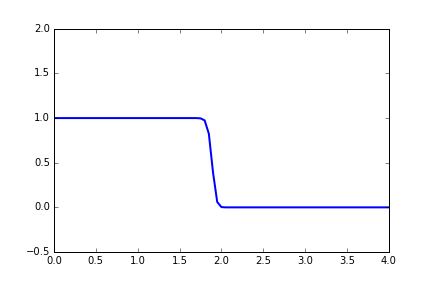
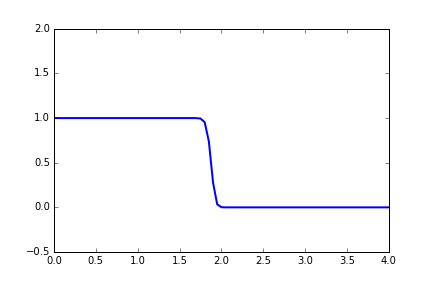
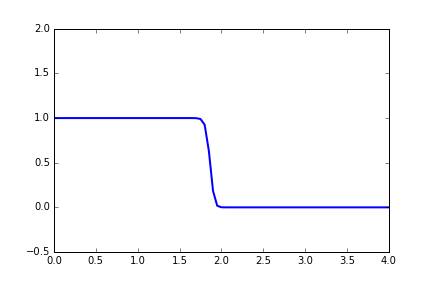
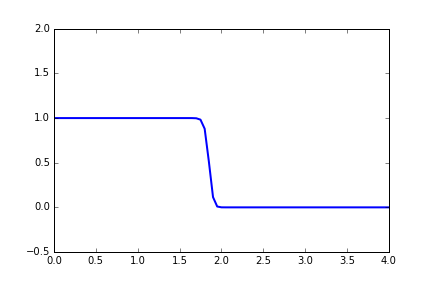
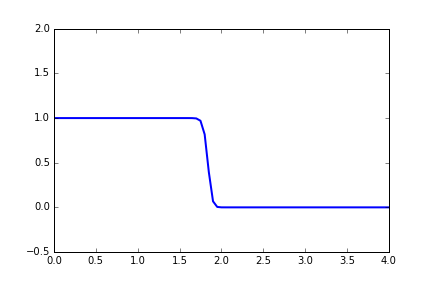
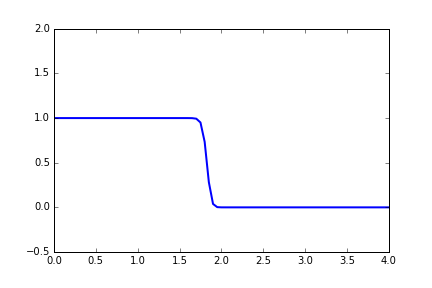
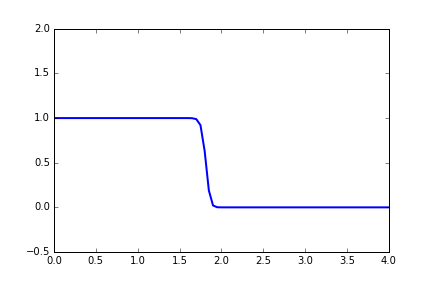
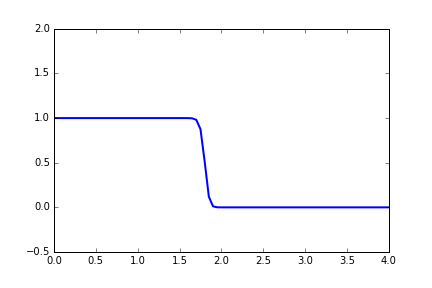
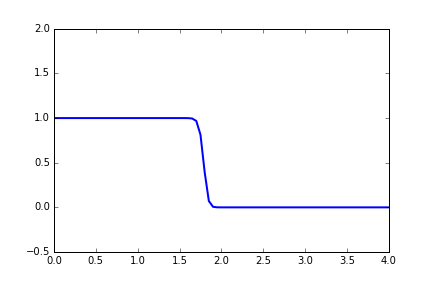
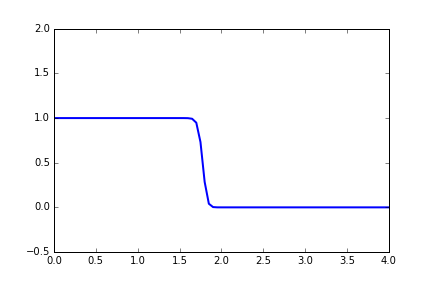
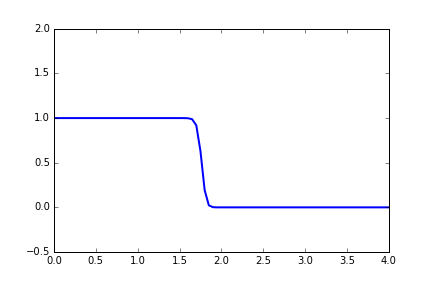
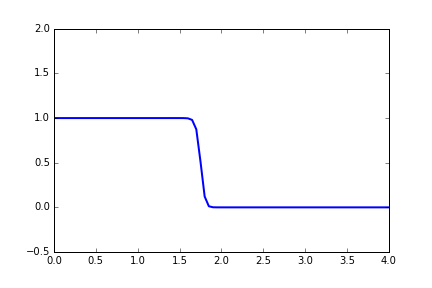
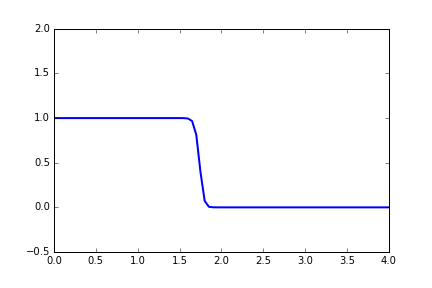
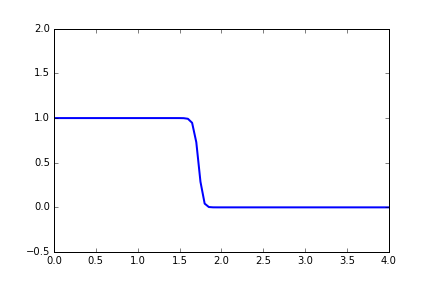
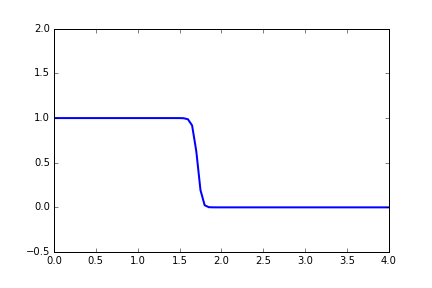
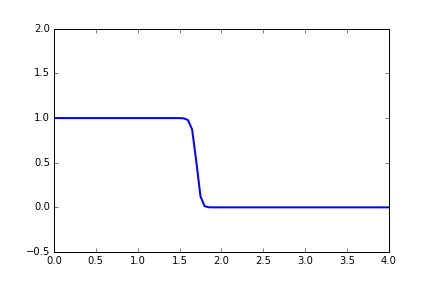
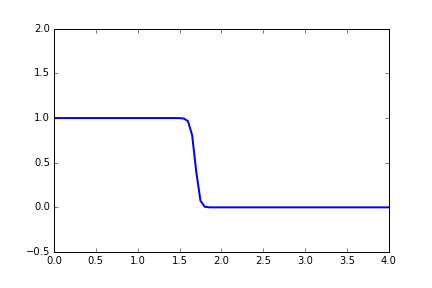
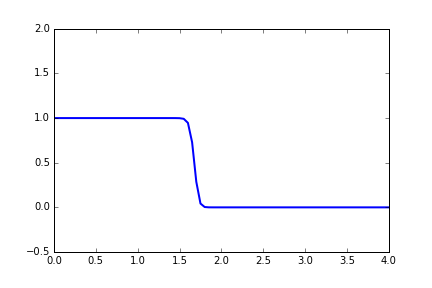
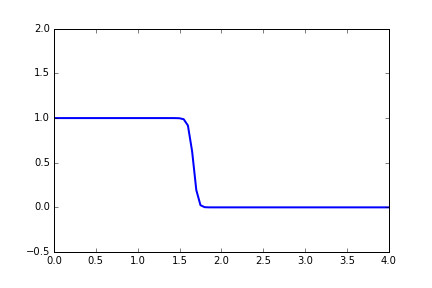
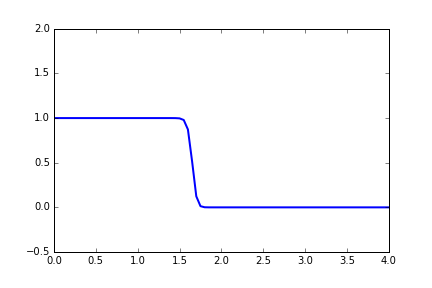
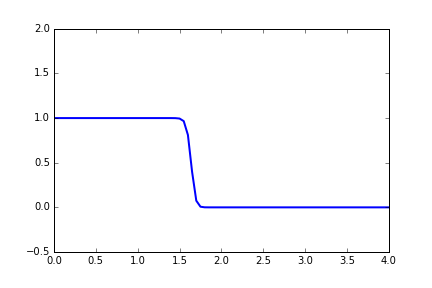
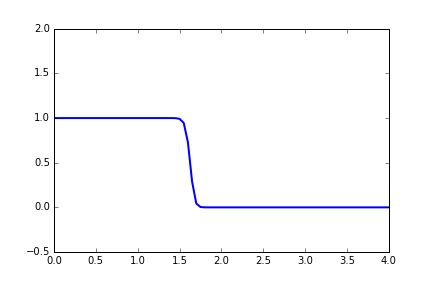
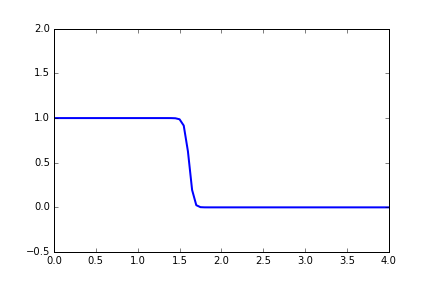
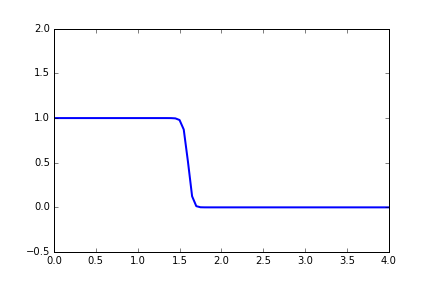
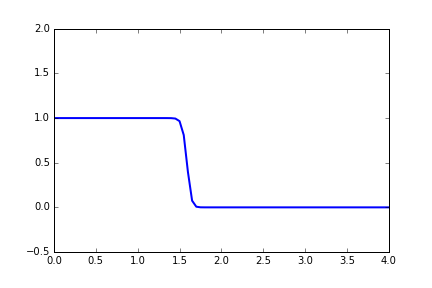
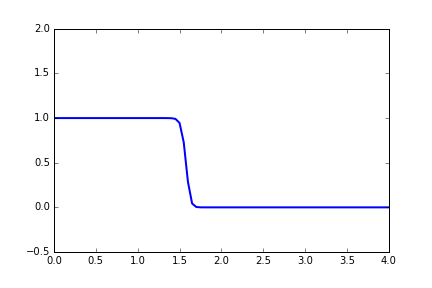
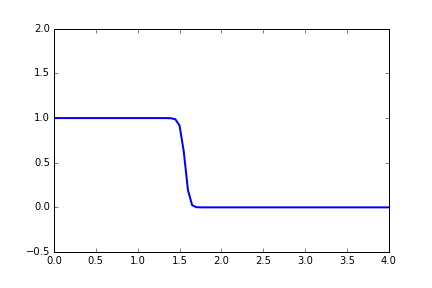
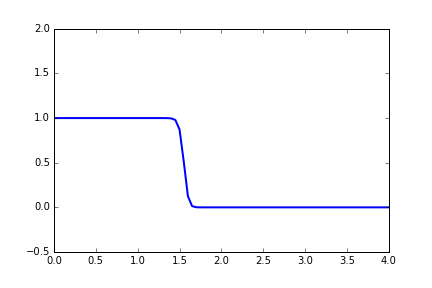
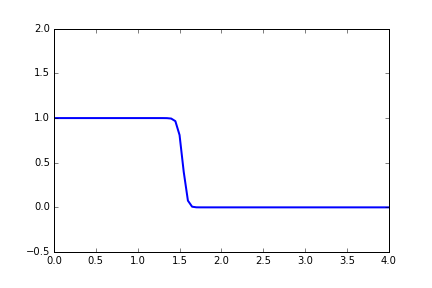
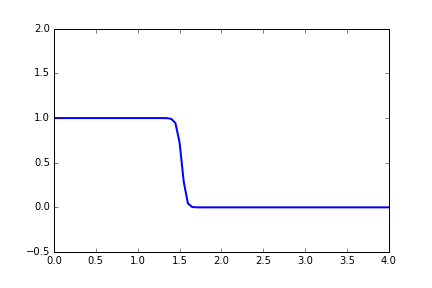
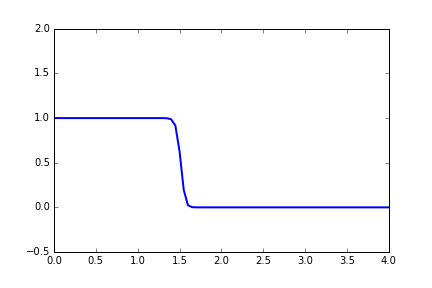
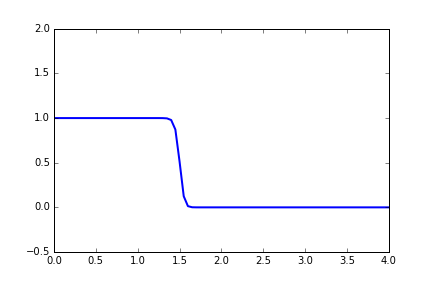
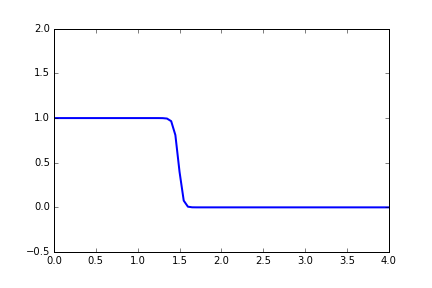
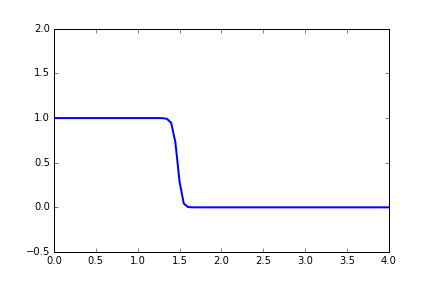
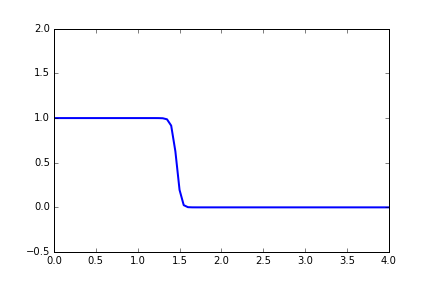
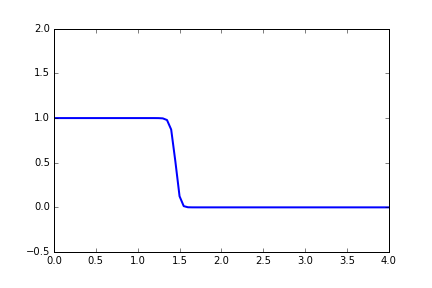
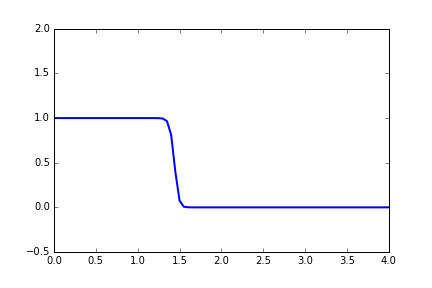
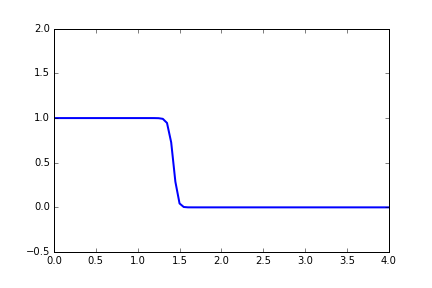
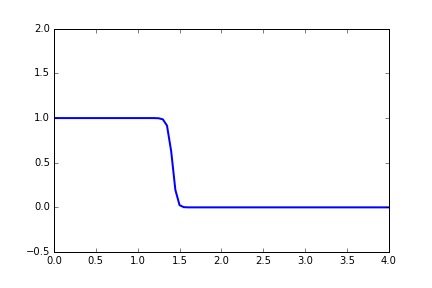
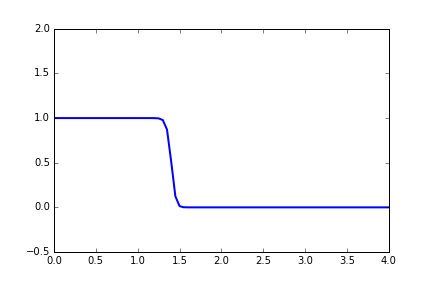
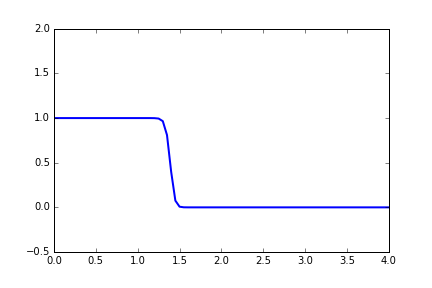
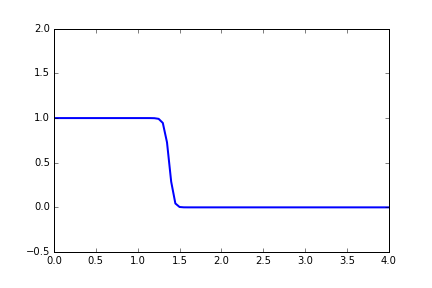
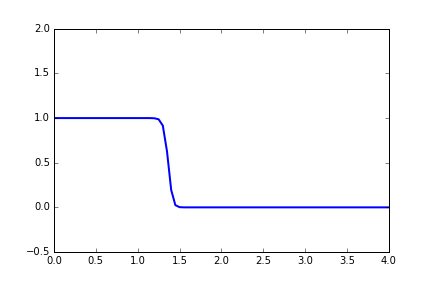
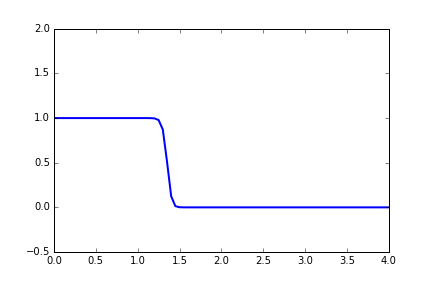
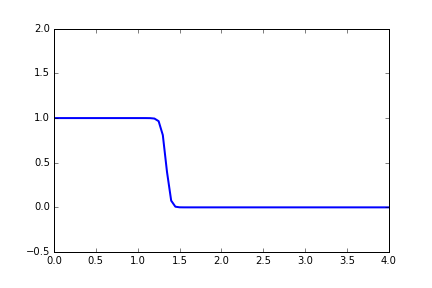
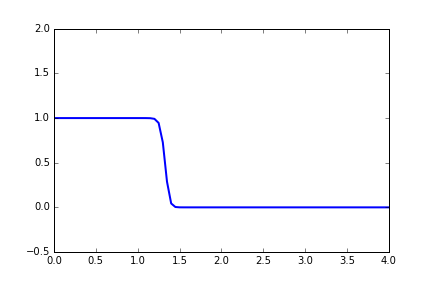
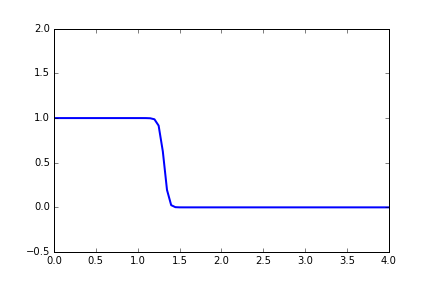
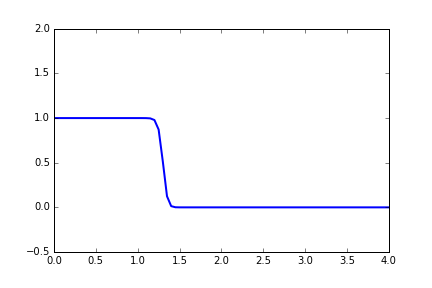
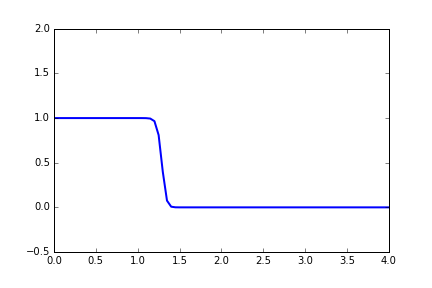
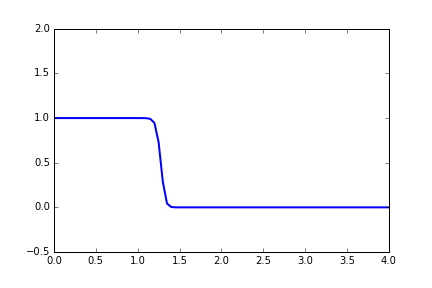
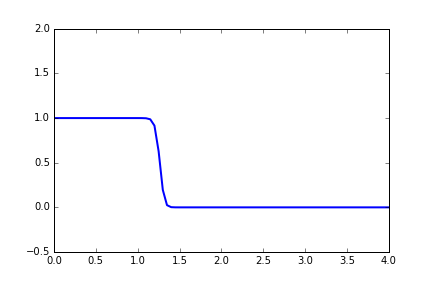
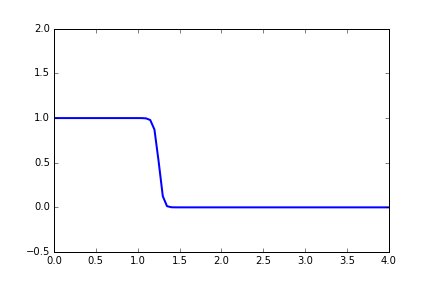
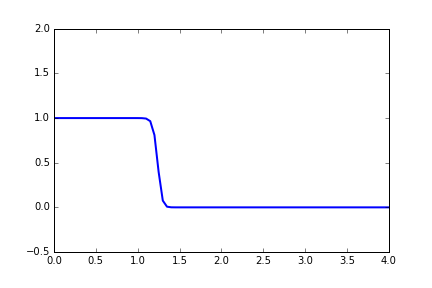
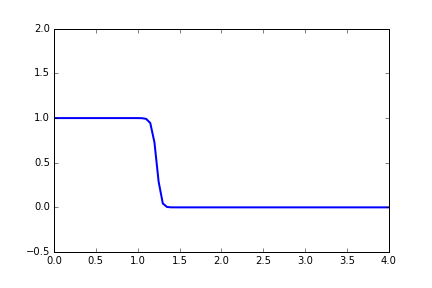
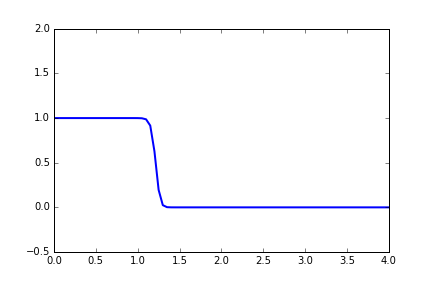
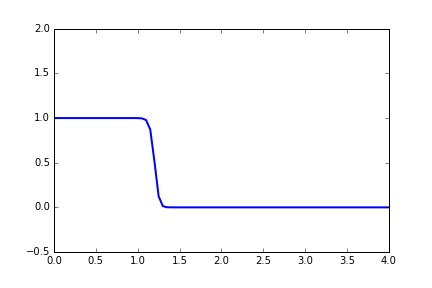
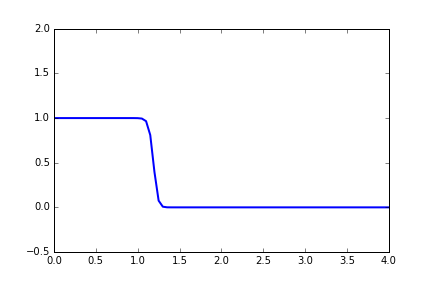
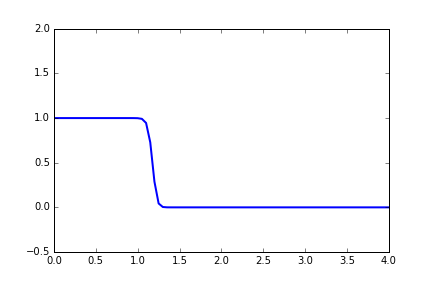
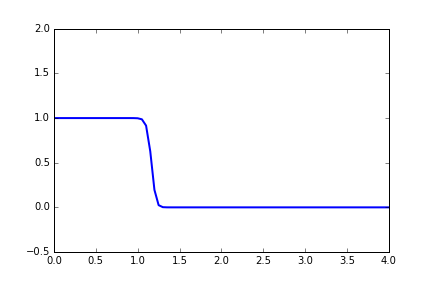

In [168]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

u = u_initial(nx)
sigma = .5
dt = sigma*dx

un = maccormack(u,nt,dt,dx)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')